# Notes on Chapter 1 of *Hands-On Machine Learning with Scikit-Learn & TensorFlow* by Aurélien Géron


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

oecd_bli = pd.read_csv("handson-ml/datasets/lifesat/oecd_bli_2015.csv", thousands=',')
# oecd_bli.index = oecd_bli.Country
gdp_per_capita = pd.read_csv("handson-ml/datasets/lifesat/gdp_per_capita.csv", thousands=',',
                             delimiter='\t', encoding='latin1', na_values='n/a')
# gdp_per_capita.index = gdp_per_capita.Country

In [2]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
life_satisfaction = (
    oecd_bli[oecd_bli.Indicator == 'Life satisfaction'].drop_duplicates('Country').set_index('Country').Value
)
life_satisfaction.head()

Country
Australia         7.3
Austria           6.9
Belgium           6.9
Canada            7.3
Czech Republic    6.5
Name: Value, dtype: float64

In [5]:
gdp = gdp_per_capita.set_index('Country')['2015']
gdp.head()

Country
Afghanistan              599.994
Albania                 3995.383
Algeria                 4318.135
Angola                  4100.315
Antigua and Barbuda    14414.302
Name: 2015, dtype: float64

In [6]:
gdp_and_satisfaction = pd.DataFrame(gdp).join(pd.DataFrame(life_satisfaction), how='inner');
gdp_and_satisfaction.columns = ['gdp', 'satisfaction']
gdp_and_satisfaction.head()

,gdp,satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3


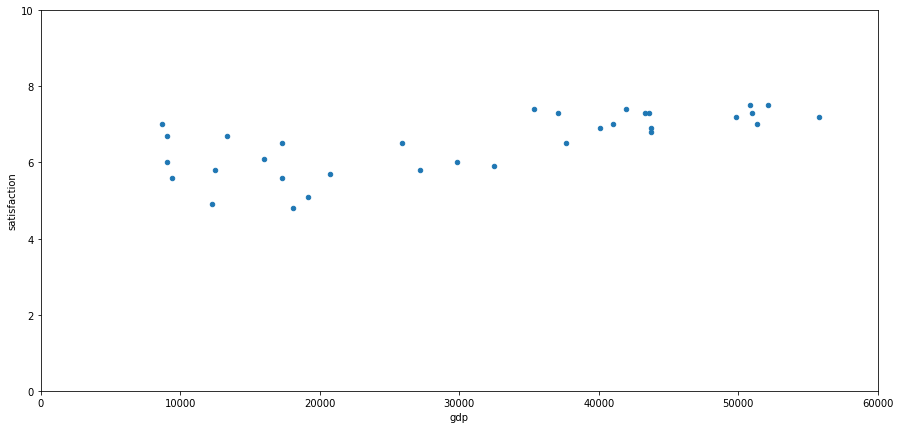

In [13]:
gdp_and_satisfaction.plot(kind='scatter', x="gdp", y='satisfaction', ylim=[0,10], xlim=[0,60000], figsize=(15,7));

In [8]:
from sklearn import linear_model
linear_regression_model = sklearn.linear_model.LinearRegression();
linear_regression_model.fit(np.c_[gdp_and_satisfaction.gdp], np.c_[gdp_and_satisfaction.satisfaction])
print(linear_regression_model.predict([[22587]]))

[[6.28653637]]
